In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
from skimage import io, filters, morphology, feature, measure

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))
from utils import *

In [3]:
path = "data/data_processed/test_data_polarisation/"
# filename = "polar1.tif"
filenames = os.listdir(path)

t = 2
im = imageio.imread(path+filenames[t])

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_processed/test_data_polarisation/'

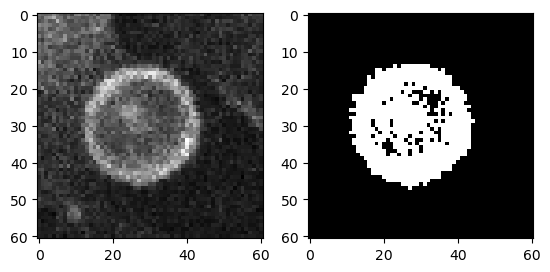

In [39]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(im[0,:,:], cmap='gray')
ax[1].imshow(im[1,:,:], cmap='gray')

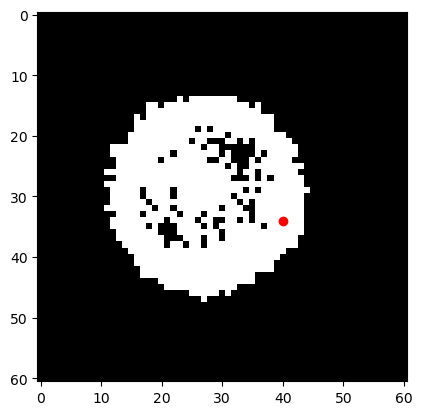

In [44]:
# Find local maxima
local_maxima_coords = feature.peak_local_max(im[0,:,:], min_distance=10)
# Find the global maximum among the local maxima
if len(local_maxima_coords) > 0:
    maxima_values = [im[0,coord[0], coord[1]] for coord in local_maxima_coords]
    global_max_index = np.argmax(maxima_values)
    global_max_coord = local_maxima_coords[global_max_index]
else:
    global_max_coord = None


plt.imshow(im[1,:,:], cmap='gray')
if global_max_coord is not None:
    plt.plot(global_max_coord[1], global_max_coord[0], 'ro')

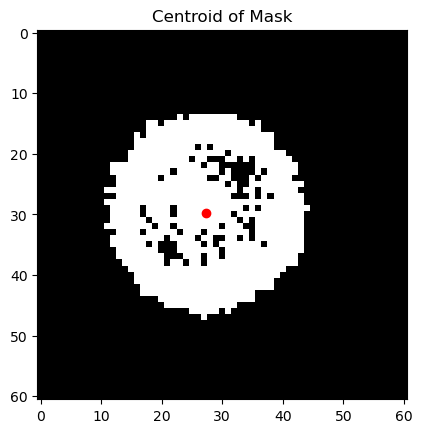

In [45]:
mask = im[1,:,:]

# Find the centroid using region properties
properties = measure.regionprops(mask)
centroid = properties[0].centroid

# Display the mask and the centroid
plt.imshow(mask, cmap='gray')
plt.plot(centroid[1], centroid[0], 'ro')  # Mark the centroid
plt.title('Centroid of Mask')
plt.show()

Text(27.25, 29.833769633507853, '')

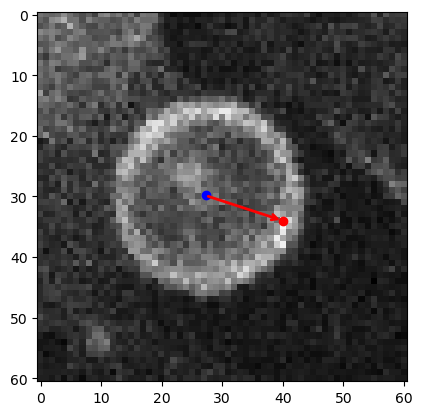

In [46]:
# create arrow

plt.imshow(im[0,:,:], cmap='gray')

plt.plot(centroid[1], centroid[0], 'bo')
plt.plot(global_max_coord[1], global_max_coord[0], 'ro')


# Define the start and end points of the arrow
start_point = (centroid[1], centroid[0])
end_point = (global_max_coord[1], global_max_coord[0])

plt.annotate(
    '', xy=end_point, xytext=start_point,
    arrowprops=dict(arrowstyle='->', color='red', lw=2)
)

# function

In [5]:
def find_polarisation(
        image: np.ndarray, 
        mask: np.ndarray,
        display=False) -> None:
    
    # Find local maxima in the image
    local_maxima_coords = feature.peak_local_max(image, min_distance=10)
    # Find the global maximum among the local maxima
    if len(local_maxima_coords) > 0:
        maxima_values = [image[coord[0], coord[1]] for coord in local_maxima_coords]
        global_max_index = np.argmax(maxima_values)
        global_max_coord = local_maxima_coords[global_max_index]
    else:
        global_max_coord = None

    # Find the centroid of the mask using region properties
    properties = measure.regionprops(mask)
    centroid = properties[0].centroid

    if display:
        fig, ax = plt.subplots(1,3)
        ax[0].imshow(image, cmap='gray')
        ax[1].imshow(mask, cmap='gray')
        
        ax[2].imshow(image, cmap='gray')
        ax[2].plot(centroid[1], centroid[0], 'bo')
        ax[2].plot(global_max_coord[1], global_max_coord[0], 'ro')
        # Define the start and end points of the arrow
        start_point = (centroid[1], centroid[0])
        end_point = (global_max_coord[1], global_max_coord[0])
        plt.annotate(
            '', xy=end_point, xytext=start_point,
            arrowprops=dict(arrowstyle='->', color='red', lw=2)
        )
    
    return global_max_coord, centroid

(array([28, 22]), (32.31479736098021, 32.72384542884072))

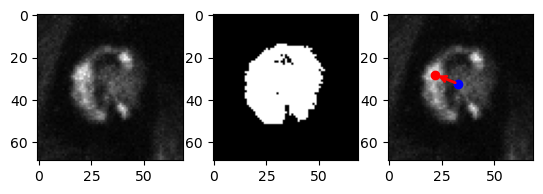

In [11]:
path = "data/test_data_polarisation/"
filenames = os.listdir(path)

t = 4
im = imageio.imread(path+filenames[t])

find_polarisation(im[0,:,:], im[1,:,:], display=True)